In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


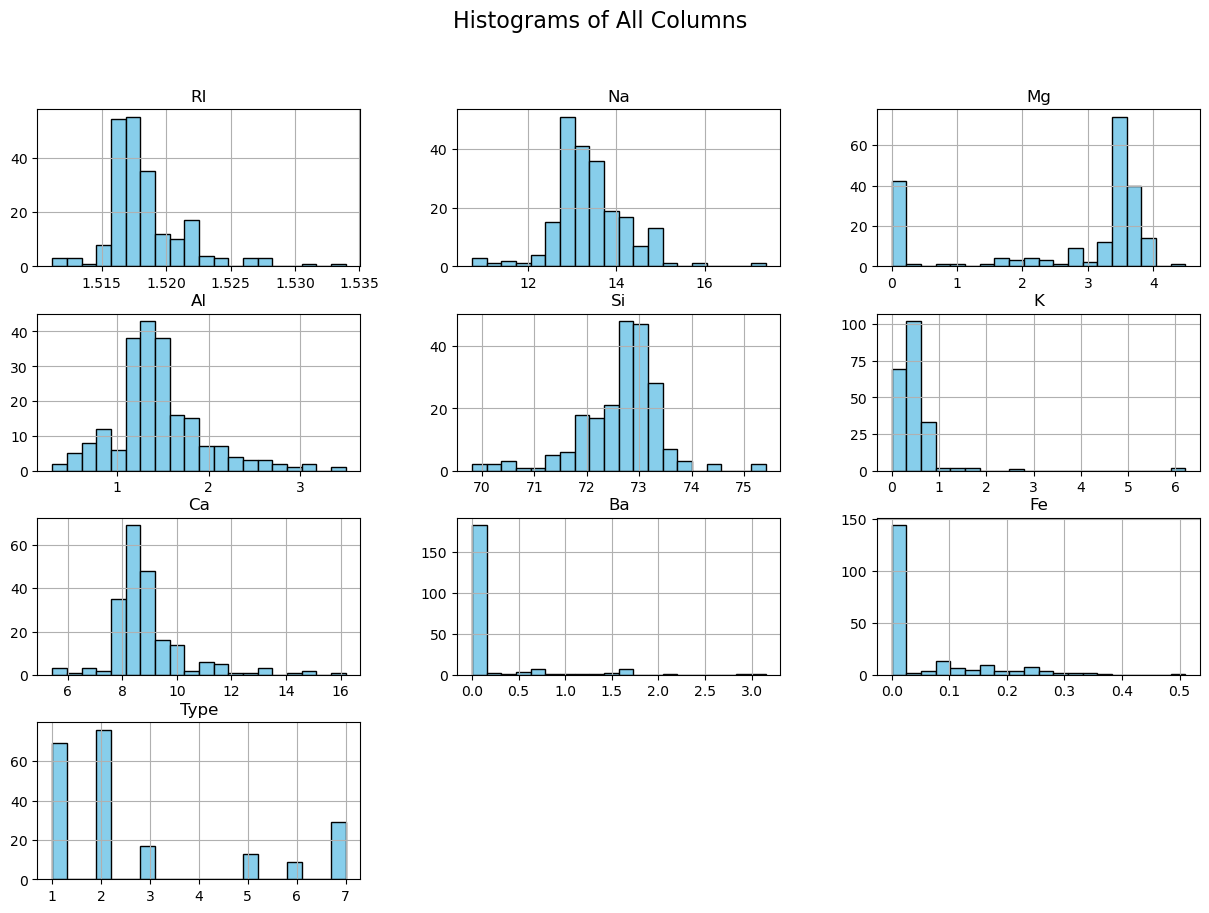

In [10]:
df.hist(figsize=(15, 10),bins=20,color='skyblue',edgecolor='black')
plt.suptitle('Histograms of All Columns',fontsize=16)
plt.show()

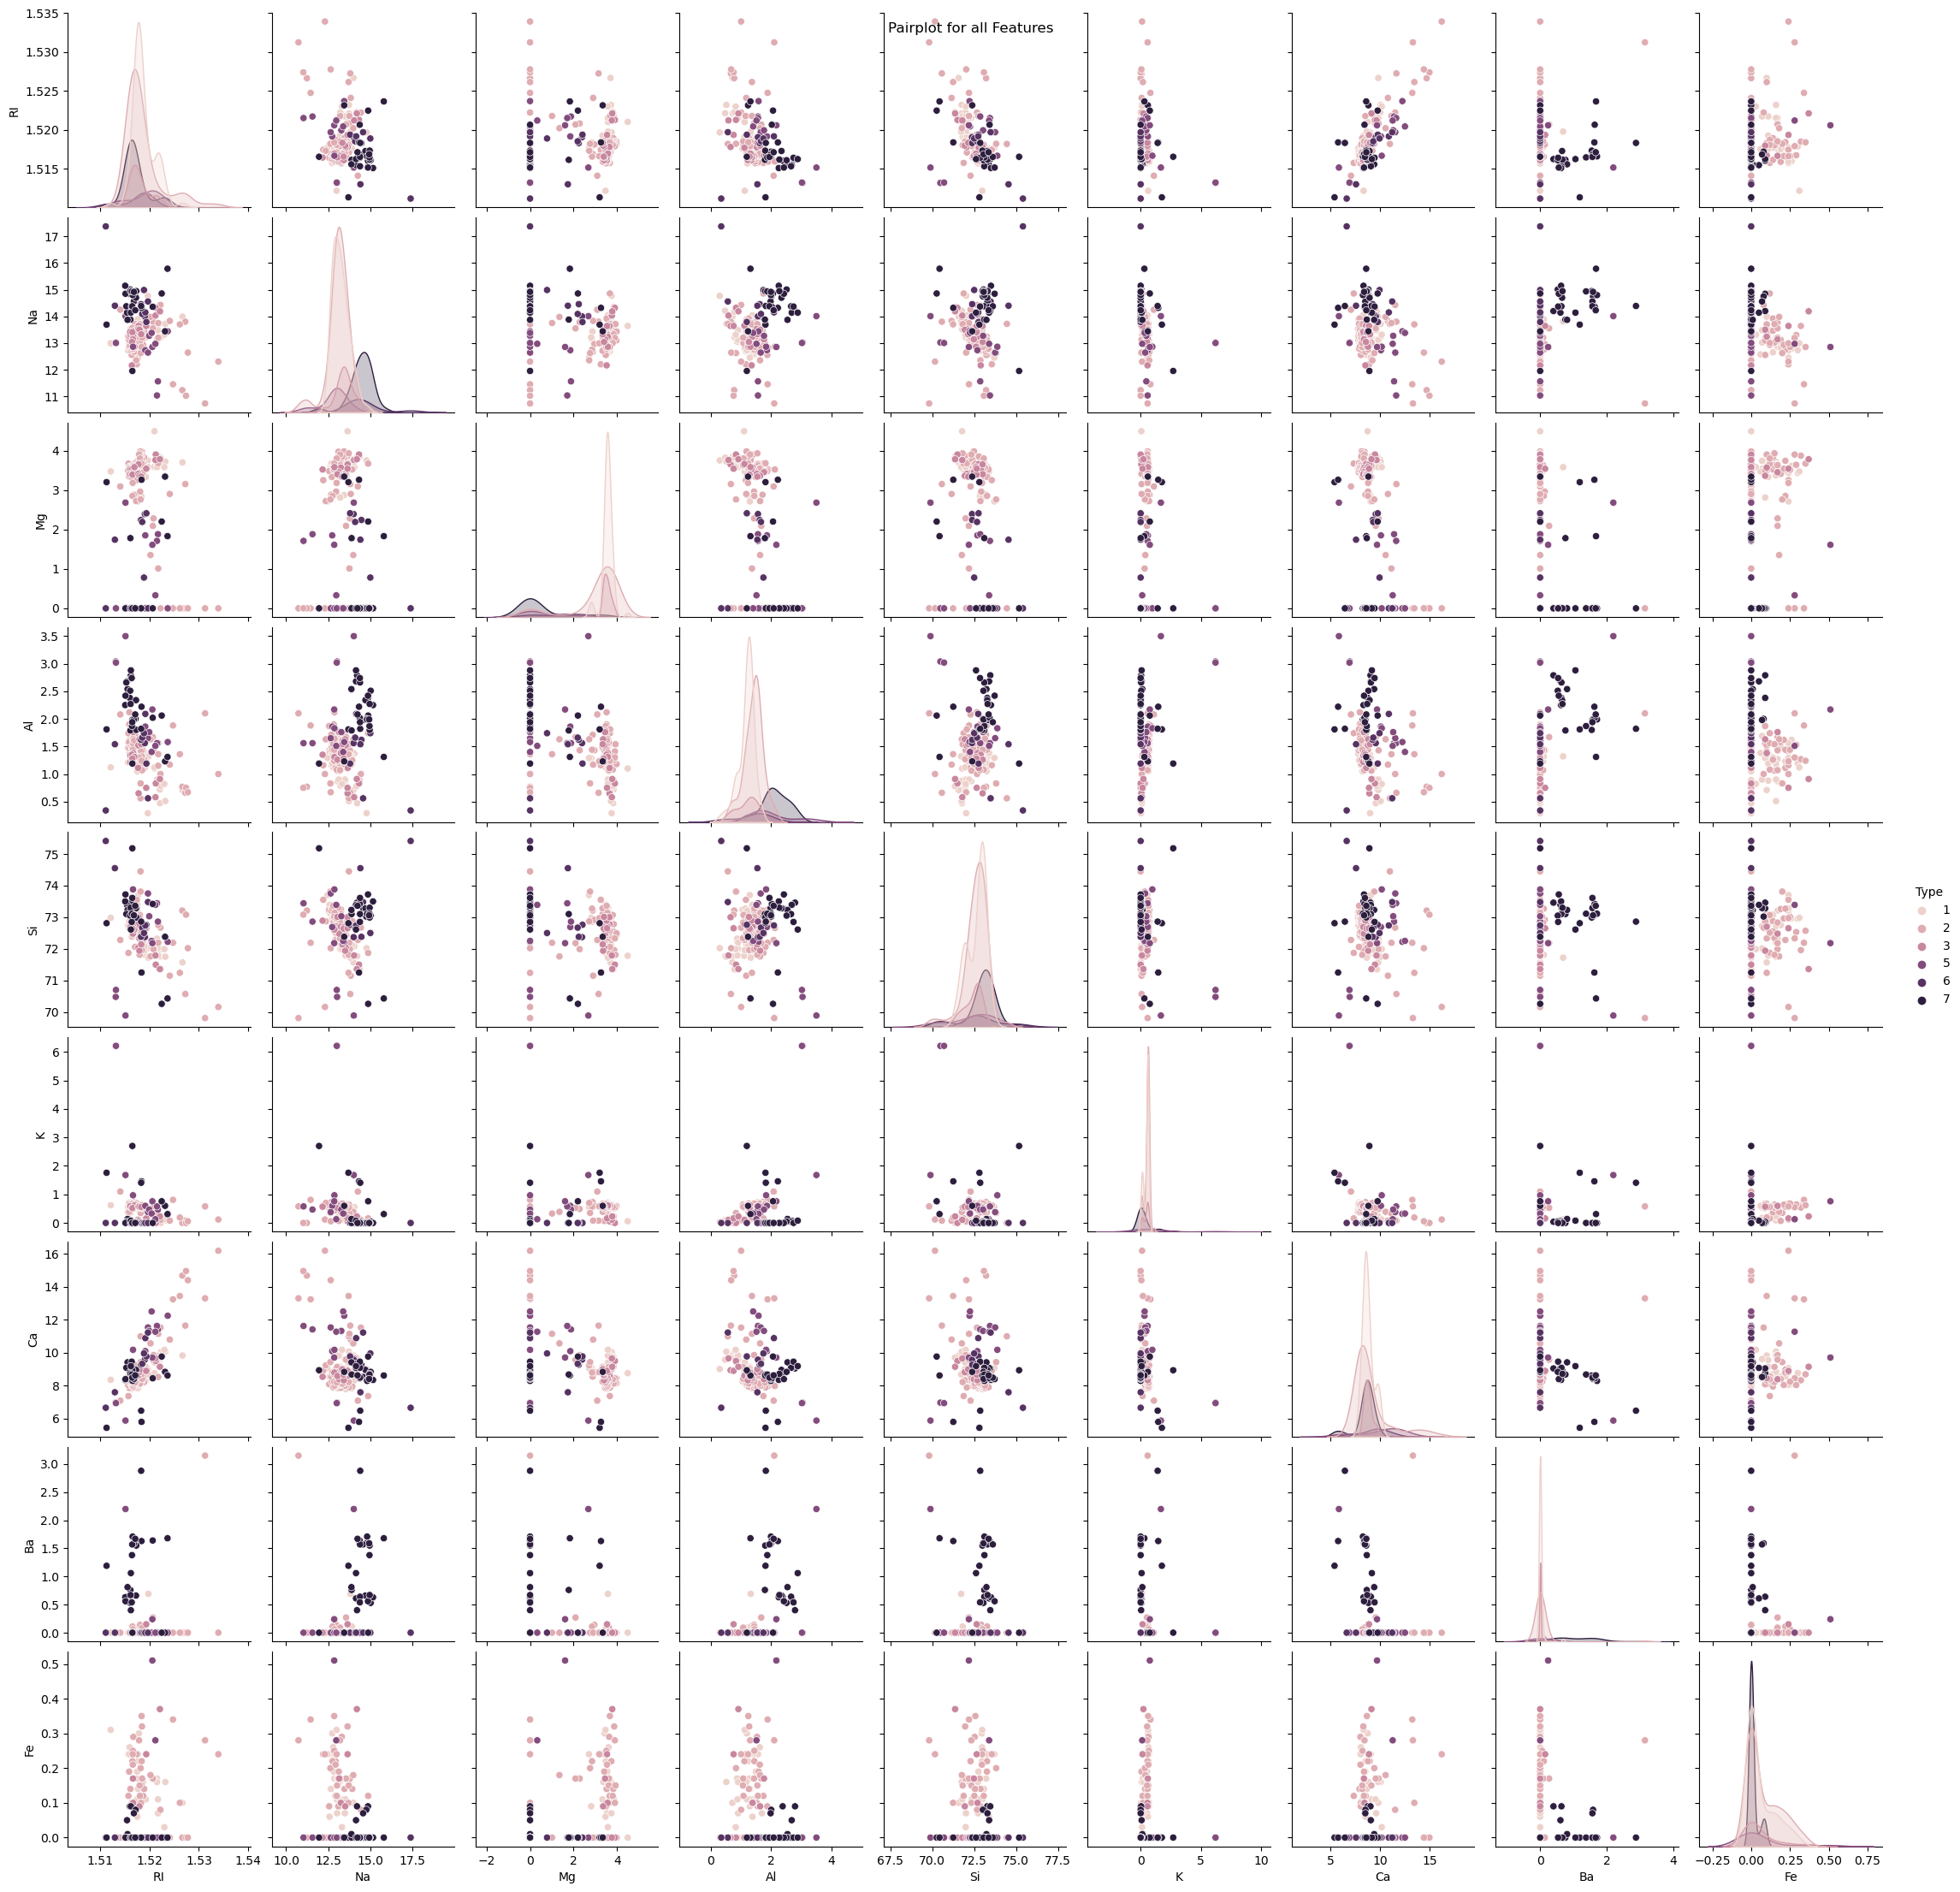

In [11]:
sns.pairplot(df, hue='Type')
plt.suptitle('Pairplot for all Features')
plt.show()

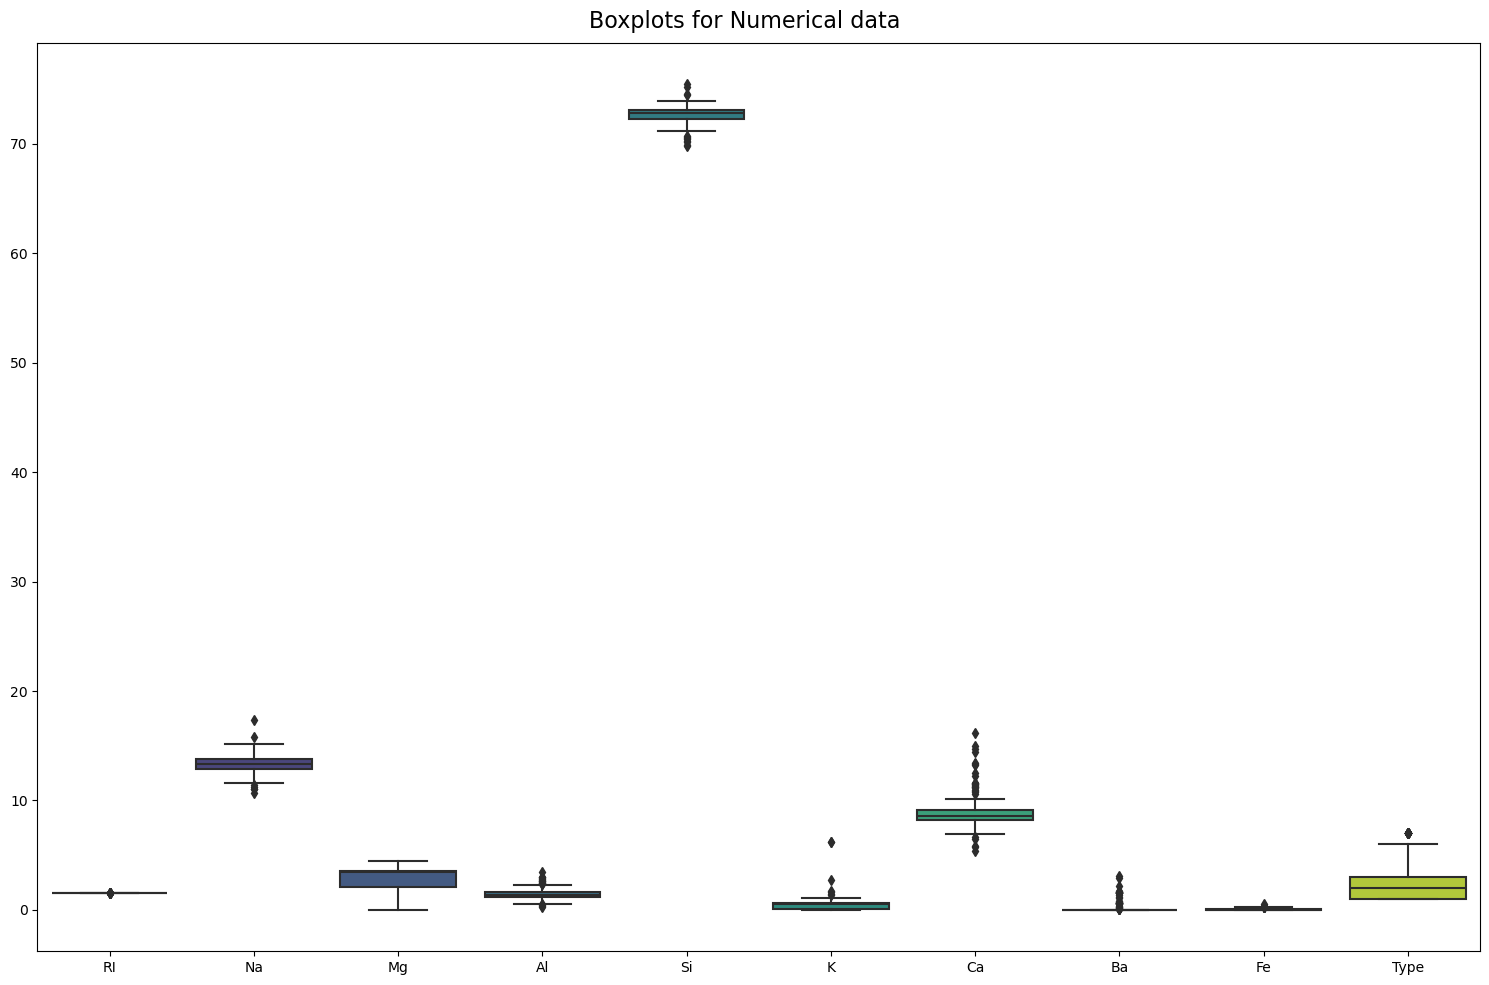

In [12]:
# Plotting Boxplots to see the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df,palette='viridis')
plt.suptitle('Boxplots for Numerical data',fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

In [14]:
columns_to_check=df.columns

In [15]:
df_cleaned=remove_outliers(df,columns_to_check)

In [16]:
df_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [17]:
features=df_cleaned.drop('Type',axis=1)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09


In [18]:
target=df_cleaned[['Type']]
target

,Type
1,1
2,1
3,1
4,1
6,1
...,...
155,3
156,3
158,3
159,3


In [19]:
corr_matrix=features.corr()
corr_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,0.112558,0.119473,-0.411694,-0.389915,-0.101900,0.527862,NaN,0.030877
Na,0.112558,1.000000,0.252616,-0.014180,-0.642772,-0.359758,-0.307472,NaN,-0.183155
Mg,0.119473,0.252616,1.000000,-0.112102,-0.282293,-0.060664,-0.483946,NaN,-0.093993
Al,-0.411694,-0.014180,-0.112102,1.000000,-0.124871,0.264455,-0.409398,NaN,-0.039480
Si,-0.389915,-0.642772,-0.282293,-0.124871,1.000000,0.072888,-0.154089,NaN,0.071728
K,-0.101900,-0.359758,-0.060664,0.264455,0.072888,1.000000,-0.036310,NaN,0.052779
Ca,0.527862,-0.307472,-0.483946,-0.409398,-0.154089,-0.036310,1.000000,NaN,0.180093
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.030877,-0.183155,-0.093993,-0.039480,0.071728,0.052779,0.180093,NaN,1.000000


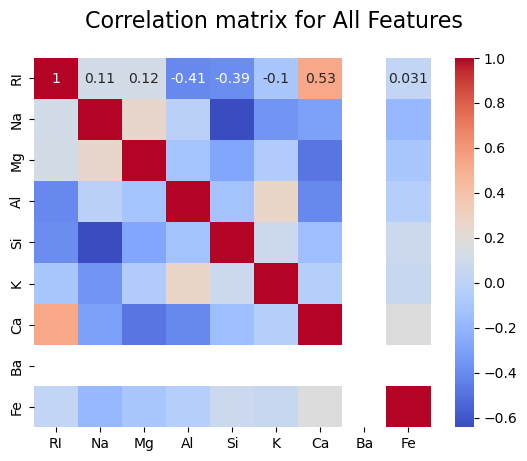

In [20]:
plt.suptitle('Correlation matrix for All Features',fontsize=16)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

In [22]:
std_sca=StandardScaler()

In [23]:
features=std_sca.fit_transform(features)
features

array([[ 2.92265983e-01,  2.26504428e+00,  4.09688548e-01,
        -1.23542200e-01, -2.34910763e-01, -1.54899255e+00,
        -1.62352390e+00,  0.00000000e+00, -5.79855610e-01],
       [-1.13471356e+00,  1.23450280e+00,  1.86612061e-01,
         8.48184683e-01,  4.75602328e-01, -2.87791742e+00,
        -1.76644457e+00,  0.00000000e+00, -5.79855610e-01],
       [ 3.42160373e-01,  3.18465941e-01,  8.11226225e-01,
        -5.01435988e-01, -5.62839882e-01, -2.20067686e-01,
        -5.08742634e-01,  0.00000000e+00, -5.79855610e-01],
       [ 1.02667302e-01,  4.90222853e-01,  4.98919143e-01,
        -7.71360122e-01,  7.21549168e-01, -5.15384323e-01,
        -9.37504659e-01,  0.00000000e+00, -5.79855610e-01],
       [ 1.12646180e-01,  5.76101309e-01,  4.09688548e-01,
        -1.31120839e+00,  7.48876594e-01, -7.24093676e-02,
        -6.51663309e-01,  0.00000000e+00, -5.79855610e-01],
       [ 2.42371593e-01,  1.46709029e-01,  4.54303846e-01,
        -1.79707183e+00,  1.15878799e+00, -2.200676

In [24]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(78, 9)
(26, 9)
(78, 1)
(26, 1)


### Random Forest

In [26]:
rand_forest=RandomForestClassifier(n_estimators=50,max_depth=3,criterion='gini',max_features=2,max_samples=0.9,bootstrap=True,random_state=100)

In [27]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=2, max_samples=0.9,
                       n_estimators=50, random_state=100)

In [28]:
y_pred=rand_forest.predict(x_test)

In [29]:
random_accuracy=accuracy_score(y_test,y_pred)
random_accuracy

0.7307692307692307

#### Bagging

In [30]:
bagging=BaggingClassifier(base_estimator=rand_forest,n_estimators=50, random_state=100)

In [31]:
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                        max_features=2,
                                                        max_samples=0.9,
                                                        n_estimators=50,
                                                        random_state=100),
                  n_estimators=50, random_state=100)

In [32]:
y_pred_bagging=bagging.predict(x_test)

In [33]:
bagging_accuracy=accuracy_score(y_test, y_pred_bagging)

### Boosting
#### AdaBoost

In [34]:
boosting=AdaBoostClassifier(base_estimator=rand_forest,n_estimators=50, random_state=100)

In [35]:
boosting.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                         max_features=2,
                                                         max_samples=0.9,
                                                         n_estimators=50,
                                                         random_state=100),
                   random_state=100)

In [36]:
y_pred_boosting=boosting.predict(x_test)

In [37]:
adaboost_accuracy=accuracy_score(y_test,y_pred_boosting)

#### Gradient Boost

In [38]:
grad_boost=GradientBoostingClassifier(learning_rate=0.2,n_estimators=50,max_depth=2,max_features=0.9,subsample=0.9)

In [39]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, max_features=0.9,
                           n_estimators=50, subsample=0.9)

In [40]:
y_pred=grad_boost.predict(x_test)

In [41]:
grad_boost_accuracy=accuracy_score(y_test,y_pred)

#### XG Boost

In [42]:
y_test.value_counts()

Type
1       13
2       13
Name: count, dtype: int64

In [43]:
lab_enc=LabelEncoder()

In [44]:
y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.fit_transform(y_test)

In [45]:
import xgboost as xgb

In [46]:
xgb_class=xgb.XGBClassifier(learning_rate=0.1,gamma=10,reg_lambda=1,n_estimators=50,min_child_weight=2)

In [47]:
xgb_class.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
y_pred=xgb_class.predict(x_test)

In [49]:
xgboost_accuracy=accuracy_score(y_test,y_pred)

In [50]:
# Comparison of results
print('Random Forest:',random_accuracy)
print('Bagging:',bagging_accuracy)
print('AdaBoost:',adaboost_accuracy)
print('Gradient Boost:',grad_boost_accuracy)
print('XGBoost:',xgboost_accuracy)

Random Forest: 0.7307692307692307
Bagging: 0.8076923076923077
AdaBoost: 0.8076923076923077
Gradient Boost: 0.8076923076923077
XGBoost: 0.7307692307692307


## Evaluated without removing outliers

In [51]:
features1=df.drop('Type',axis=1)
features1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [52]:
target1=df[['Type']]
target1

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [53]:
corr_matrix1=features1.corr()
corr_matrix1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


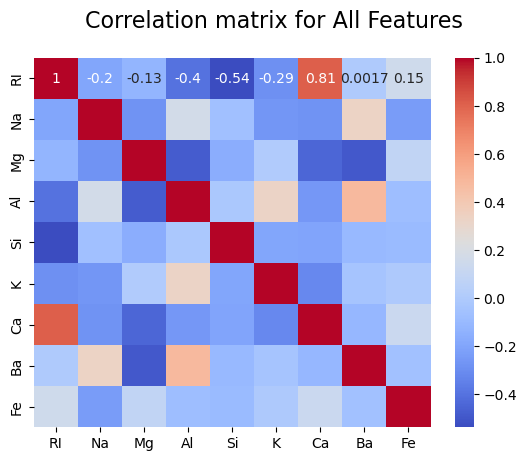

In [54]:
plt.suptitle('Correlation matrix for All Features',fontsize=16)
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.show()

In [55]:
features1=std_sca.fit_transform(features1)
features1

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.75,random_state=100)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 9)
(54, 9)
(159, 1)
(54, 1)


In [58]:
rand_forest1=RandomForestClassifier(n_estimators=50,max_depth=3,criterion='gini',max_features=2,max_samples=0.9,bootstrap=True,random_state=100)

In [59]:
rand_forest1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=2, max_samples=0.9,
                       n_estimators=50, random_state=100)

In [60]:
y_pred1=rand_forest1.predict(x_test)

In [61]:
random_accuracy1=accuracy_score(y_test,y_pred1)
random_accuracy1

0.5740740740740741

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging:

Bagging aims to reduce the variance of a model by training multiple instances of the same model on different subsets of the data.
These subsets are generated by randomly sampling the data with replacement, so each model gets a slightly different view of the data.
Each model is trained independently, and their predictions are averaged (for regression) or majority-voted (for classification) to make the final predictio

Boosting:

Boosting focuses on reducing bias by sequentially building models. Each new model is trained to correct the errors made by the previous models.
It starts with an initial model, and subsequent models are trained on the residual errors of the previous model. The final prediction is a weighted sum of the predictions from all models.
Unlike bagging, boosting models are dependent on each other, and the training process is sequential.

2. Explain how to handle imbalance in the data.